<a href="https://colab.research.google.com/github/RodrigoGuedesDP/IA/blob/main/Machine%20Learning/Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisis de variables

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

from sklearn.preprocessing import MinMaxScaler

ruta = '/content/TB2.csv'




try:
    # 1. Crear el DataFrame en base a la ruta del CSV
    df = pd.read_csv(ruta)

    print(f"✅ DataFrame creado exitosamente desde la ruta: '{ruta}'")
    print("\n--- Primeras 5 filas del DataFrame para verificación ---")
    print(df.head())
    print("\n" + "="*60 + "\n")

    # 2. Ver todos los headers (encabezados)
    print("--- Headers (encabezados) encontrados en el archivo ---")
    # La propiedad .columns contiene un índice con todos los nombres de las columnas
    print(df.columns)
    print("\n" + "="*60 + "\n")

    # 3. Guardar los headers en una variable
    # Usamos .tolist() para convertir el índice de columnas en una lista de Python
    lista_headers = df.columns.tolist()

    print("✅ Los headers se han guardado en la variable 'lista_headers'.")
    print("Contenido de la variable:")
    print(lista_headers)

except FileNotFoundError:
    print(f"⚠️ ¡Error! No se encontró el archivo en la ruta especificada.")
    print(f"Por favor, verifica que la ruta '{ruta_del_archivo}' es correcta.")
    print("Asegúrate de que el nombre del archivo y las mayúsculas/minúsculas coincidan exactamente.")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

/tmp/ipython-input-3944213377.py:16: DtypeWarning: Columns (47,81) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta)


✅ DataFrame creado exitosamente desde la ruta: '/content/TB2.csv'

--- Primeras 5 filas del DataFrame para verificación ---
   Id_Proyecto    Latitud   Longitud  Absorción Mensual  \
0          436 -12.119226 -77.006976                NaN   
1          489 -12.088815 -77.061316                NaN   
2          489 -12.088815 -77.061316                NaN   
3          790 -12.111548 -77.046815                NaN   
4          790 -12.111548 -77.046815                NaN   

  Área de Juegos para Niños  Área Libre  Área Techada  Área Total  \
0                        no         0.0         94.59       94.59   
1                        no         0.0        119.94      119.94   
2                        no         0.0        119.94      119.94   
3                        no         0.0        100.68      100.68   
4                        no         0.0        103.54      103.54   

  Áreas Verdes Ascensor Directo  ... Techos Ecológicos Terraza  \
0           no               no  ...    

['Id_Proyecto', 'Latitud', 'Longitud', 'Absorción Mensual', 'Área de Juegos para Niños', 'Área Libre', 'Área Techada', 'Área Total', 'Áreas Verdes', 'Ascensor Directo', 'Banco Financiador', 'Bar', 'Boulevard Peatonal', 'Caballerizas', 'Cafetería', 'Cancha de Frontón', 'Cancha de Fulbito', 'Cancha de Futsal', 'Cancha de Squash', 'Cancha de Tenis', 'Cantidad de Ascensores', 'Cantidad de Baños', 'Cantidad de Depósitos', 'Cantidad de Dormitorios', 'Cantidad de Estacionamientos', 'Cantidad de Etapas', 'Cantidad de Pisos', 'Cantidad de Sótanos', 'Cantidad de Unidades', 'Cantidad de Unidades en Oferta', 'Cantidad de Unidades Separadas', 'Cantidad de Unidades Totales', 'Cantidad de Unidades Vendidas', 'Cantidad Total de Estacionamientos', 'Capilla', 'Club House', 'Cuarto de Servicio', 'Departamento', 'Dirección', 'Directorio', 'Distrito', 'Estado de Inmueble', 'Estado del Proyecto', 'Etapa de Construcción', 'Fase de Proyecto', 'Fecha de Entrega', 'Fecha de Inicio de Venta', 'Fecha de Venta', '

## Modelo Regresion Lineal

In [5]:
# --- CÓDIGO DE DIAGNÓSTICO ---
import pandas as pd

ruta = '/content/TB2.csv'
df_diagnostico = pd.read_csv(ruta)

# Eliminar solo las columnas que decidimos quitar
df_diagnostico = df_diagnostico.drop(columns=['Absorción Mensual', 'Id_Proyecto'], errors='ignore')

print("--- Análisis de Valores Nulos (NaN) por Columna ---")
missing_values = df_diagnostico.isnull().sum()
missing_percentage = (missing_values / len(df_diagnostico)) * 100
missing_info = pd.DataFrame({'Cantidad Nulos': missing_values, '% Nulos': missing_percentage})

# Mostramos solo las columnas que tienen al menos un valor nulo, ordenadas
print(missing_info[missing_info['Cantidad Nulos'] > 0].sort_values(by='Cantidad Nulos', ascending=False))

print(f"\nNúmero de filas ANTES de dropna(): {len(df_diagnostico)}")

# Aplicamos dropna() para confirmar que se vacía
df_diagnostico.dropna(inplace=True)
print(f"Número de filas DESPUÉS de dropna(): {len(df_diagnostico)}")

/tmp/ipython-input-448511207.py:5: DtypeWarning: Columns (47,81) have mixed types. Specify dtype option on import or set low_memory=False.
  df_diagnostico = pd.read_csv(ruta)


--- Análisis de Valores Nulos (NaN) por Columna ---
                                Cantidad Nulos     % Nulos
Meses para Agotar Stock                 174445  100.000000
Cantidad de Unidades Separadas          172248   98.740577
Cantidad de Unidades en Oferta          128954   73.922440
Precio por m2 - Oferta $                128954   73.922440
Cantidad de Unidades Vendidas            47688   27.336983
Precio de Venta                          47688   27.336983
Fecha de Venta                           47688   27.336983
Velocidad Venta                          47688   27.336983
Precio por m2 - Vendido $                47688   27.336983
Sub distrito                             35860   20.556622
Geometría                                 4217    2.417381

Número de filas ANTES de dropna(): 174445
Número de filas DESPUÉS de dropna(): 0


In [ ]:
# --- PASO 0: IMPORTACIONES ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# --- PASO 1: CARGA DE DATOS ---
# Usamos low_memory=False para suprimir la advertencia, ya que la manejaremos manualmente
ruta = '/content/TB2.csv'
try:
    df_original = pd.read_csv(ruta, low_memory=False)
    print("✅ DataFrame original cargado exitosamente.")
except FileNotFoundError:
    print(f"⚠️ ¡Error! No se encontró el archivo en la ruta: '{ruta}'")
    exit()

# --- PASO 2: LIMPIEZA Y FEATURE ENGINEERING ESTRATÉGICO ---
print("\n" + "="*80 + "\n")
print("--- INICIANDO LIMPIEZA Y FEATURE ENGINEERING ---")
df = df_original.copy()

# 2.1. Convertir columnas de precio a numéricas (soluciona el DtypeWarning)
cols_precio = ['Precio por m2 - Oferta Solarizado', 'Precio por m2 - Venta Solarizado', 'Precio de Venta']
for col in cols_precio:
    if col in df.columns:
        # 'coerce' convierte los no-numéricos en NaN, que luego imputaremos
        df[col] = pd.to_numeric(df[col], errors='coerce')
print("-> Columnas de precio convertidas a formato numérico.")

# 2.2. Eliminar columnas de identificadores, con fuga de datos o inútiles
columnas_a_eliminar = [
    'Absorción Mensual', 'Id_Proyecto', 'Meses para Agotar Stock',
    'Cantidad de Unidades Separadas', 'Cantidad de Unidades en Oferta',
    'Precio por m2 - Oferta $', 'Fecha de Venta', 'Nombre de Proyecto', 'Dirección',
    'Geometría' # Redundante con Lat/Lon
]
df = df.drop(columns=columnas_a_eliminar, errors='ignore')
print("-> Columnas innecesarias, de ID y con fuga de datos eliminadas.")

# 2.3. Filtrar el universo de datos: solo propiedades vendidas
df.dropna(subset=['Velocidad Venta'], inplace=True)
print(f"-> Filtrado por 'Velocidad Venta'. Se mantienen {len(df)} registros.")

# 2.4. Manejo de Alta Cardinalidad en 'Tipología'
if 'Tipología' in df.columns:
    # Contamos las ocurrencias de cada tipología
    counts = df['Tipología'].value_counts()
    # Definimos un umbral (ej: las 20 más comunes)
    threshold = 20
    # Obtenemos la lista de las tipologías a mantener
    repl = counts.nlargest(threshold).index
    # Las que no están en esa lista, se reemplazan por 'Otro'
    df['Tipología'] = df['Tipología'].where(df['Tipología'].isin(repl), 'Otro')
    print(f"-> 'Tipología' agrupada: se mantienen las {threshold} más comunes y el resto como 'Otro'.")

# 2.5. Optimización de memoria (ahora más efectivo)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
    elif 'float' in str(df[col].dtype):
        df[col] = df[col].astype('float32')
    elif 'int' in str(df[col].dtype):
        df[col] = df[col].astype('int32')
print("-> Memoria optimizada usando tipos 'category', 'float32' e 'int32'.")

# 2.6. Eliminar columnas constantes (con un solo valor único)
for col in df.columns:
    if df[col].nunique() == 1:
        df.drop(col, axis=1, inplace=True)
        print(f"-> Columna constante '{col}' eliminada.")

# 2.7. One-Hot Encoding para las categóricas restantes
columnas_categoricas = df.select_dtypes(include=['category']).columns
df = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True, dtype=int)
print("-> One-Hot Encoding aplicado a las columnas categóricas restantes.")

print("\n✅ Limpieza y Feature Engineering completados.")
print(f"Dimensiones finales del DataFrame para el modelo: {df.shape}")
print("\n" + "="*80 + "\n")


# --- PASO 3: PREPARACIÓN PARA EL MODELO ---
print("--- PREPARANDO DATOS PARA EL MODELO ---")
X = df.drop('Velocidad Venta', axis=1)
y = df['Velocidad Venta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"-> Datos divididos: {len(X_train)} para entrenamiento, {len(X_test)} para prueba.")

# Imputar y escalar
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
print("-> Valores nulos imputados.")

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("-> Features escaladas.")
print("\n" + "="*80 + "\n")


# --- PASO 4: ENTRENAMIENTO Y EVALUACIÓN DEL MODELO ---
print("--- ENTRENANDO Y EVALUANDO LA REGRESIÓN LINEAL ---")
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("-> Modelo de Regresión Lineal entrenado.")

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Métricas de Rendimiento del Modelo Base ---")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print("\n" + "="*80 + "\n")


# --- PASO 5: INTERPRETACIÓN ---
print("--- INTERPRETACIÓN DE RESULTADOS ---")
coeficientes = pd.DataFrame(model.coef_, index=X.columns, columns=['Coeficiente'])
coeficientes_sorted = coeficientes.reindex(coeficientes.Coeficiente.abs().sort_values(ascending=False).index)

print("\n--- Features más influyentes según el modelo ---")
print(coeficientes_sorted.head(15))

✅ DataFrame original cargado exitosamente.


--- INICIANDO LIMPIEZA Y FEATURE ENGINEERING ---
-> Columnas de precio convertidas a formato numérico.
-> Columnas innecesarias, de ID y con fuga de datos eliminadas.
-> Filtrado por 'Velocidad Venta'. Se mantienen 126757 registros.
-> 'Tipología' agrupada: se mantienen las 20 más comunes y el resto como 'Otro'.
-> Memoria optimizada usando tipos 'category', 'float32' e 'int32'.
-> Columna constante 'Áreas Verdes' eliminada.
-> Columna constante 'Caballerizas' eliminada.
-> Columna constante 'Cantidad de Unidades' eliminada.
-> Columna constante 'Cantidad de Unidades Vendidas' eliminada.
-> Columna constante 'Capilla' eliminada.
-> Columna constante 'Estado de Inmueble' eliminada.
-> Columna constante 'Fitness Center' eliminada.
-> Columna constante 'Periodo' eliminada.
-> Columna constante 'Pista para Trotar-Correr' eliminada.
-> Columna constante 'Plaza de Toros y Gallos' eliminada.
-> Columna constante 'Sala de Reuniones' eliminada.
-> On

✅ DataFrame original cargado exitosamente.


--- INICIANDO PREPROCESAMIENTO PARA LIGHTGBM ---
-> Columnas de precio convertidas a numérico.
-> Columnas innecesarias eliminadas.
-> Filtrado por 'Velocidad Venta'. Se mantienen 126757 registros.
-> Columnas de texto convertidas al tipo 'category' para LightGBM.

✅ Preprocesamiento para LightGBM completado.
Dimensiones del DataFrame: (126757, 97)


--- PREPARANDO DATOS PARA EL MODELO ---
-> Datos divididos: 101405 para entrenamiento, 25352 para prueba.


--- ENTRENANDO Y EVALUANDO LIGHTGBM ---
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059673 seconds.
You can set `force_row_wise=true` to re

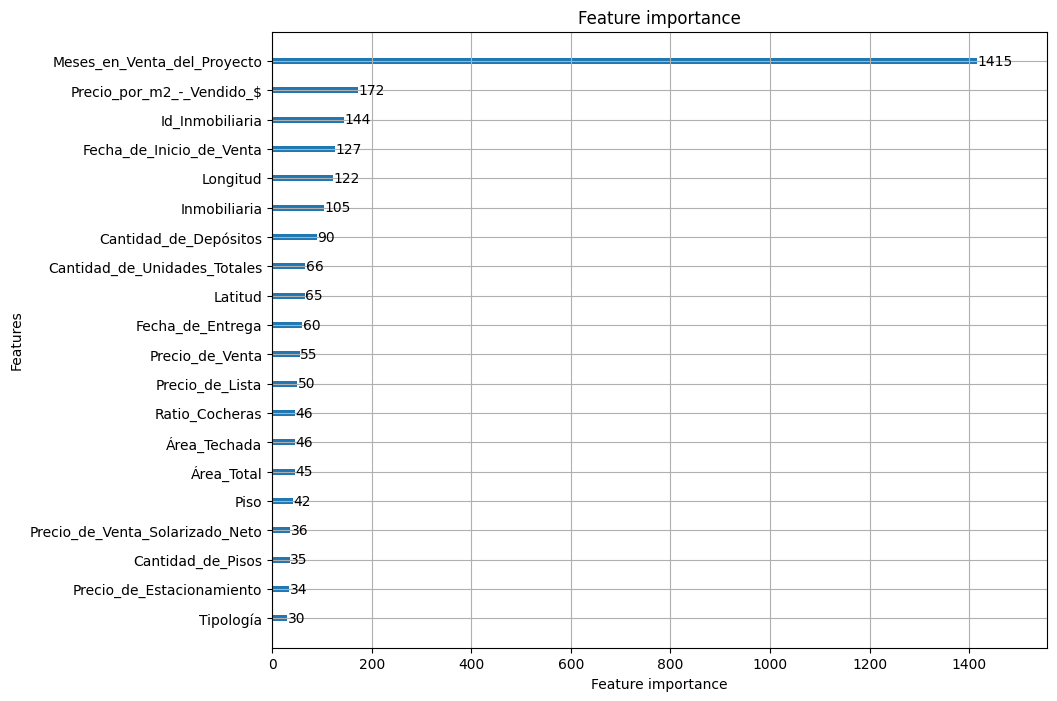

In [2]:
# --- PASO 0: IMPORTACIONES ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb # Importamos LightGBM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# --- PASO 1: CARGA DE DATOS ---
ruta = '/content/TB2.csv'
try:
    df_original = pd.read_csv(ruta, low_memory=False)
    print("✅ DataFrame original cargado exitosamente.")
except FileNotFoundError:
    print(f"⚠️ ¡Error! No se encontró el archivo en la ruta: '{ruta}'")
    exit()

# --- PASO 2: LIMPIEZA Y PREPROCESAMIENTO MÍNIMO PARA LIGHTGBM ---
print("\n" + "="*80 + "\n")
print("--- INICIANDO PREPROCESAMIENTO PARA LIGHTGBM ---")
df = df_original.copy()

# 2.1. Convertir columnas de precio a numéricas
cols_precio = ['Precio por m2 - Venta Solarizado', 'Precio de Venta']
for col in cols_precio:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
print("-> Columnas de precio convertidas a numérico.")

# 2.2. Eliminar columnas de ID y con fuga de datos
columnas_a_eliminar = [
    'Absorción Mensual', 'Id_Proyecto', 'Meses para Agotar Stock',
    'Cantidad de Unidades Separadas', 'Cantidad de Unidades en Oferta',
    'Precio por m2 - Oferta $', 'Fecha de Venta', 'Nombre de Proyecto', 'Dirección',
    'Geometría', 'Precio por m2 - Oferta Solarizado' # No la usamos para predecir venta
]
df = df.drop(columns=columnas_a_eliminar, errors='ignore')
print("-> Columnas innecesarias eliminadas.")

# 2.3. Filtrar por el universo de datos de ventas
df.dropna(subset=['Velocidad Venta'], inplace=True)
print(f"-> Filtrado por 'Velocidad Venta'. Se mantienen {len(df)} registros.")

# 2.4. ¡CRÍTICO! Convertir 'object' a 'category' para que LightGBM las reconozca
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
print("-> Columnas de texto convertidas al tipo 'category' para LightGBM.")

print("\n✅ Preprocesamiento para LightGBM completado.")
print(f"Dimensiones del DataFrame: {df.shape}")
print("\n" + "="*80 + "\n")


# --- PASO 3: PREPARACIÓN PARA EL MODELO LIGHTGBM ---
print("--- PREPARANDO DATOS PARA EL MODELO ---")
X = df.drop('Velocidad Venta', axis=1)
y = df['Velocidad Venta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"-> Datos divididos: {len(X_train)} para entrenamiento, {len(X_test)} para prueba.")
print("\n" + "="*80 + "\n")


# --- PASO 4: ENTRENAMIENTO Y EVALUACIÓN DE LIGHTGBM ---
print("--- ENTRENANDO Y EVALUANDO LIGHTGBM ---")

# Crear el modelo. 'objective='regression'' es para problemas de regresión.
lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)

# Entrenar el modelo. LightGBM maneja los NaN y las categorías internamente.
lgb_model.fit(X_train, y_train)
print("-> Modelo LightGBM entrenado.")

# Realizar predicciones
y_pred = lgb_model.predict(X_test)

# Evaluar el rendimiento
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Métricas de Rendimiento del Modelo LightGBM ---")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print("\n" + "="*80 + "\n")

# --- PASO 5: INTERPRETACIÓN (Feature Importance) ---
print("--- FEATURES MÁS IMPORTANTES SEGÚN LIGHTGBM ---")
lgb.plot_importance(lgb_model, max_num_features=20, figsize=(10, 8))
plt.show()

✅ DataFrame original cargado exitosamente.


--- INICIANDO PREPROCESAMIENTO (SIN FUGA DE DATOS) ---
✅ Verificación exitosa: 17 columnas eliminadas.
-> Preprocesamiento restante completado.


--- ENTRENANDO Y EVALUANDO EL MODELO HONESTO ---
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15430
[LightGBM] [Info] Number of data points in the train set: 101405, number of used features: 79
[LightGBM] [Info] Start training from score 0.029131
-> Modelo LightGBM entrenado.

--- Métric

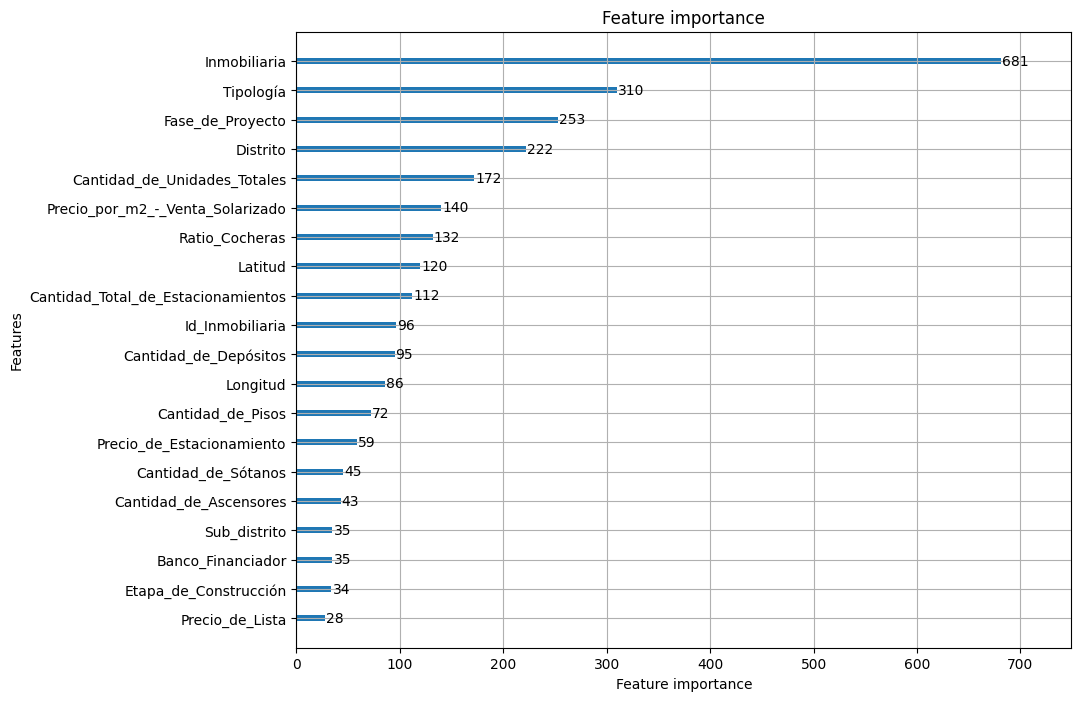

In [6]:
# --- PASO 0: IMPORTACIONES ---
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# --- PASO 1: CARGA DE DATOS ---
ruta = '/content/TB2.csv'
try:
    df_original = pd.read_csv(ruta, low_memory=False)
    print("✅ DataFrame original cargado exitosamente.")
except FileNotFoundError:
    print(f"⚠️ ¡Error! No se encontró el archivo en la ruta: '{ruta}'")
    exit()

# --- PASO 2: PREPROCESAMIENTO CORRECTO (CON NOMBRES EXACTOS) ---
print("\n" + "="*80 + "\n")
print("--- INICIANDO PREPROCESAMIENTO (SIN FUGA DE DATOS) ---")
df = df_original.copy()

# 2.1. ¡CRÍTICO! Lista de columnas a eliminar con los nombres EXACTOS
columnas_con_fuga = [
    'Meses en Venta del Proyecto',
    'Precio de Venta',
    'Precio por m2 - Vendido $',
    'Precio de Venta Solarizado Neto',
    'Fecha de Inicio de Venta',
    'Fecha de Entrega',
    'Fecha de Venta'
]

columnas_innecesarias = [
    'Absorción Mensual',
    'Id_Proyecto',
    'Meses para Agotar Stock',
    'Cantidad de Unidades Separadas',
    'Cantidad de Unidades en Oferta',
    'Precio por m2 - Oferta $',
    'Nombre de Proyecto',
    'Dirección',
    'Geometría',
    'Precio por m2 - Oferta Solarizado'
]

columnas_a_eliminar = columnas_con_fuga + columnas_innecesarias

# 2.2. Eliminar las columnas (ahora con 'errors="raise"' para no fallar en silencio)
try:
    df.drop(columns=columnas_a_eliminar, inplace=True)
    print(f"✅ Verificación exitosa: {len(columnas_a_eliminar)} columnas eliminadas.")
except KeyError as e:
    print(f"⚠️ ¡ERROR! No se pudo eliminar una columna: {e}")
    print("Revisa que el nombre esté perfecto en la lista.")
    exit()


# El resto del preprocesamiento continúa como antes...
df.dropna(subset=['Velocidad Venta'], inplace=True)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
print("-> Preprocesamiento restante completado.")
print("\n" + "="*80 + "\n")


# --- PASO 3: PREPARACIÓN PARA EL MODELO ---
X = df.drop('Velocidad Venta', axis=1)
y = df['Velocidad Venta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- PASO 4: ENTRENAMIENTO Y EVALUACIÓN DEL MODELO HONESTO ---
print("--- ENTRENANDO Y EVALUANDO EL MODELO HONESTO ---")
lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)
lgb_model.fit(X_train, y_train)
print("-> Modelo LightGBM entrenado.")

y_pred = lgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Métricas de Rendimiento del Modelo HONESTO ---")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print("\n" + "="*80 + "\n")


# --- PASO 5: INTERPRETACIÓN REAL ---
print("--- FEATURES MÁS IMPORTANTES (MODELO HONESTO) ---")
lgb.plot_importance(lgb_model, max_num_features=20, figsize=(10, 8))
plt.show()

✅ DataFrame original cargado exitosamente.


--- INICIANDO PREPROCESAMIENTO FINAL (100% SIN FUGA DE DATOS) ---
✅ Verificación exitosa: 18 columnas eliminadas.
-> Preprocesamiento restante completado.


--- ENTRENANDO Y EVALUANDO EL MODELO FINAL Y HONESTO ---
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7331
[LightGBM] [Info] Number of data points in the train set: 101405, number of used features: 78
[LightGBM] [Info] Start training from score 0.029131
-> Modelo LightGBM entr

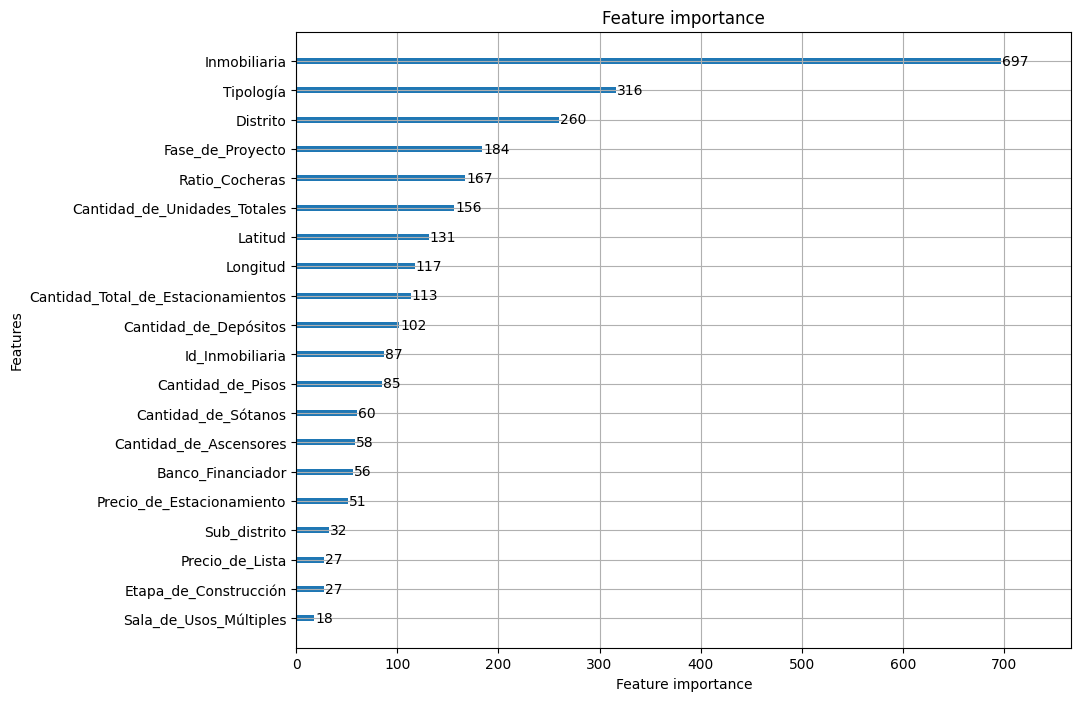

In [7]:
# --- PASO 0: IMPORTACIONES ---
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# --- PASO 1: CARGA DE DATOS ---
ruta = '/content/TB2.csv'
try:
    df_original = pd.read_csv(ruta, low_memory=False)
    print("✅ DataFrame original cargado exitosamente.")
except FileNotFoundError:
    print(f"⚠️ ¡Error! No se encontró el archivo en la ruta: '{ruta}'")
    exit()

# --- PASO 2: PREPROCESAMIENTO FINAL (100% SIN FUGA DE DATOS) ---
print("\n" + "="*80 + "\n")
print("--- INICIANDO PREPROCESAMIENTO FINAL (100% SIN FUGA DE DATOS) ---")
df = df_original.copy()

# 2.1. ¡CRÍTICO! Lista de columnas a eliminar con los nombres EXACTOS
columnas_con_fuga = [
    'Meses en Venta del Proyecto',
    'Precio de Venta',
    'Precio por m2 - Vendido $',
    'Precio de Venta Solarizado Neto',
    'Fecha de Inicio de Venta',
    'Fecha de Entrega',
    'Fecha de Venta',
    'Precio por m2 - Venta Solarizado' # ¡AÑADIMOS EL ÚLTIMO FUGITIVO!
]

columnas_innecesarias = [
    'Absorción Mensual', 'Id_Proyecto', 'Meses para Agotar Stock',
    'Cantidad de Unidades Separadas', 'Cantidad de Unidades en Oferta',
    'Precio por m2 - Oferta $', 'Nombre de Proyecto', 'Dirección',
    'Geometría', 'Precio por m2 - Oferta Solarizado'
]

columnas_a_eliminar = columnas_con_fuga + columnas_innecesarias

# 2.2. Eliminar las columnas
try:
    df.drop(columns=columnas_a_eliminar, inplace=True)
    print(f"✅ Verificación exitosa: {len(columnas_a_eliminar)} columnas eliminadas.")
except KeyError as e:
    print(f"⚠️ ¡ERROR! No se pudo eliminar una columna: {e}")
    exit()

# El resto del preprocesamiento continúa...
df.dropna(subset=['Velocidad Venta'], inplace=True)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
print("-> Preprocesamiento restante completado.")
print("\n" + "="*80 + "\n")


# --- PASO 3: PREPARACIÓN PARA EL MODELO ---
X = df.drop('Velocidad Venta', axis=1)
y = df['Velocidad Venta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- PASO 4: ENTRENAMIENTO Y EVALUACIÓN DEL MODELO FINAL ---
print("--- ENTRENANDO Y EVALUANDO EL MODELO FINAL Y HONESTO ---")
lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)
lgb_model.fit(X_train, y_train)
print("-> Modelo LightGBM entrenado.")

y_pred = lgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Métricas de Rendimiento del Modelo FINAL ---")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print("\n" + "="*80 + "\n")


# --- PASO 5: INTERPRETACIÓN ESTRATÉGICA ---
print("--- FEATURES MÁS IMPORTANTES (MODELO FINAL) ---")
lgb.plot_importance(lgb_model, max_num_features=20, figsize=(10, 8))
plt.show()

## Ranking de inmobiliarias con mejor marca

In [8]:
import pandas as pd
import numpy as np

# --- CONFIGURACIÓN ---
ruta = '/content/TB2.csv'
# Establecemos un umbral mínimo de ventas para que una inmobiliaria sea considerada
# Esto evita que empresas con muy pocas ventas distorsionen el resultado.
umbral_minimo_de_ventas = 50


# --- CARGA Y PREPARACIÓN DE DATOS PARA EL ANÁLISIS ---
try:
    # Para este análisis, necesitamos el DataFrame original con los datos de venta
    df_analisis = pd.read_csv(ruta, low_memory=False)
    print("✅ DataFrame original cargado para el análisis.")
except FileNotFoundError:
    print(f"⚠️ ¡Error! No se encontró el archivo en la ruta: '{ruta}'")
    exit()

# Seleccionamos las columnas que necesitamos para este análisis específico
columnas_esenciales = ['Inmobiliaria', 'Velocidad Venta', 'Precio por m2 - Vendido $']

# Limpiamos los datos:
# 1. Nos aseguramos de que las columnas clave no tengan valores nulos
df_limpio = df_analisis.dropna(subset=columnas_esenciales).copy()

# 2. Nos aseguramos de que la columna de precio sea numérica
df_limpio['Precio por m2 - Vendido $'] = pd.to_numeric(
    df_limpio['Precio por m2 - Vendido $'], errors='coerce'
)
# Volvemos a eliminar nulos por si la conversión anterior generó alguno
df_limpio.dropna(subset=['Precio por m2 - Vendido $'], inplace=True)

print(f"-> Se analizarán {len(df_limpio)} registros de ventas con datos completos.")
print("\n" + "="*80 + "\n")


# --- ANÁLISIS: AGRUPAR POR INMOBILIARIA Y CALCULAR MÉTRICAS ---
print("--- REALIZANDO EL ANÁLISIS DE RENDIMIENTO POR INMOBILIARIA ---")

# Agrupamos por 'Inmobiliaria' y calculamos la media de las métricas y el total de ventas
ranking = df_limpio.groupby('Inmobiliaria').agg(
    Velocidad_Venta_Promedio=('Velocidad Venta', 'mean'),
    Precio_m2_Vendido_Promedio=('Precio por m2 - Vendido $', 'mean'),
    Numero_de_Ventas=('Inmobiliaria', 'count')
)

# Filtramos para quedarnos solo con las inmobiliarias que superan el umbral mínimo
ranking_filtrado = ranking[ranking['Numero_de_Ventas'] >= umbral_minimo_de_ventas].copy()
print(f"-> Se encontraron {len(ranking_filtrado)} inmobiliarias con más de {umbral_minimo_de_ventas} ventas.")

# Ordenamos el ranking por la velocidad de venta promedio, de mayor a menor
ranking_final = ranking_filtrado.sort_values(by='Velocidad_Venta_Promedio', ascending=False)


# --- PRESENTACIÓN DE RESULTADOS ---
print("\n" + "="*80 + "\n")
print("🏆 --- TOP 20 INMOBILIARIAS POR VELOCIDAD DE VENTA PROMEDIO --- 🏆")
print(f"(Considerando solo empresas con más de {umbral_minimo_de_ventas} ventas registradas)")

# Seleccionamos el top 20
top_20_inmobiliarias = ranking_final.head(20)

# Usamos .style.format() para que la tabla se vea más legible
styled_table = top_20_inmobiliarias.style.format({
    'Velocidad_Venta_Promedio': '{:.4f}',
    'Precio_m2_Vendido_Promedio': '${:,.2f}',
    'Numero_de_Ventas': '{:,.0f}'
})

# Mostramos la tabla estilizada
display(styled_table)

✅ DataFrame original cargado para el análisis.
-> Se analizarán 126757 registros de ventas con datos completos.


--- REALIZANDO EL ANÁLISIS DE RENDIMIENTO POR INMOBILIARIA ---
-> Se encontraron 215 inmobiliarias con más de 50 ventas.


🏆 --- TOP 20 INMOBILIARIAS POR VELOCIDAD DE VENTA PROMEDIO --- 🏆
(Considerando solo empresas con más de 50 ventas registradas)


,Velocidad_Venta_Promedio,Precio_m2_Vendido_Promedio,Numero_de_Ventas
Inmobiliaria,,,
Inverdes,0.1307,"$1,867.66",88
Franca Inmobiliaria,0.1046,"$2,335.35",59
Fortem Gestora Inmobiliaria,0.0984,"$1,867.52",60
Lima Metro Cuadrado,0.0832,"$1,765.32",60
Beca Inmobiliaria,0.0797,"$1,855.15",149
Grupo Dicon,0.0749,"$2,073.22",98
Domun Inmobiliaria,0.0741,"$1,928.54",59
Mc Inversiones Inmobiliarias,0.0732,"$1,666.04",63
Redbay Inmobiliaria,0.0714,"$2,587.02",53


## archivo para compartir

In [9]:
# --- PASO 0: IMPORTACIONES ---
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import joblib # Librería para guardar/cargar el modelo

# --- PASO 1: CARGA Y PREPROCESAMIENTO ---
ruta = '/content/TB2.csv'
df_original = pd.read_csv(ruta, low_memory=False)
df = df_original.copy()

# --- PASO 2: ANONIMIZACIÓN DE DATOS SENSIBLES ---
print("--- ANONIMIZANDO DATOS SENSIBLES ---")

# Anomimizar 'Inmobiliaria'
# 1. Crear un mapa de nombres reales a códigos anónimos
inmobiliaria_map = {name: f"Inmobiliaria_{i}" for i, name in enumerate(df['Inmobiliaria'].unique())}
# 2. Aplicar el mapa a la columna
df['Inmobiliaria'] = df['Inmobiliaria'].map(inmobiliaria_map)
print("-> Nombres de 'Inmobiliaria' anonimizados.")

# Anomimizar 'Nombre de Proyecto' (aunque luego la eliminemos, es buena práctica)
proyecto_map = {name: f"Proyecto_{i}" for i, name in enumerate(df['Nombre de Proyecto'].unique())}
df['Nombre de Proyecto'] = df['Nombre de Proyecto'].map(proyecto_map)
print("-> Nombres de 'Nombre de Proyecto' anonimizados.")

# --- PASO 3: LIMPIEZA (USANDO EL CÓDIGO FINAL ANTERIOR) ---
# (Omitimos los prints para abreviar, la lógica es la misma)
columnas_con_fuga = [
    'Meses en Venta del Proyecto', 'Precio de Venta', 'Precio por m2 - Vendido $',
    'Precio de Venta Solarizado Neto', 'Fecha de Inicio de Venta',
    'Fecha de Entrega', 'Fecha de Venta', 'Precio por m2 - Venta Solarizado'
]
columnas_innecesarias = [
    'Absorción Mensual', 'Id_Proyecto', 'Meses para Agotar Stock',
    'Cantidad de Unidades Separadas', 'Cantidad de Unidades en Oferta',
    'Precio por m2 - Oferta $', 'Nombre de Proyecto', 'Dirección',
    'Geometría', 'Precio por m2 - Oferta Solarizado'
]
columnas_a_eliminar = columnas_con_fuga + columnas_innecesarias
df.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')
df.dropna(subset=['Velocidad Venta'], inplace=True)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

# --- PASO 4: ENTRENAMIENTO DEL MODELO (SOBRE DATOS ANONIMIZADOS) ---
X = df.drop('Velocidad Venta', axis=1)
y = df['Velocidad Venta']
# No necesitamos train/test split aquí, entrenaremos con todos los datos para el mejor modelo final
lgb_model_final = lgb.LGBMRegressor(objective='regression', random_state=42)
lgb_model_final.fit(X, y)
print("\n✅ Modelo final entrenado sobre datos anonimizados.")

# --- PASO 5: GUARDAR LOS "ARTEFACTOS" DEL MODELO ---
# 1. Guardar el modelo entrenado
joblib.dump(lgb_model_final, 'modelo_velocidad_venta.joblib')
print("-> Modelo guardado en 'modelo_velocidad_venta.joblib'")

# 2. Guardar la lista exacta de columnas y su orden
joblib.dump(X.columns.tolist(), 'model_columns.joblib')
print("-> Columnas del modelo guardadas en 'model_columns.joblib'")

# 3. Guardar las categorías válidas para las columnas categóricas
categorical_info = {col: X[col].cat.categories.tolist() for col in X.select_dtypes(include='category').columns}
joblib.dump(categorical_info, 'categorical_info.joblib')
print("-> Información de categorías guardada en 'categorical_info.joblib'")

print("\n¡Proceso completado! Envía a tu compañero los 3 archivos .joblib y el script de Python de la Parte 2.")

--- ANONIMIZANDO DATOS SENSIBLES ---
-> Nombres de 'Inmobiliaria' anonimizados.
-> Nombres de 'Nombre de Proyecto' anonimizados.
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 126757, number of used features: 78
[LightGBM] [Info] Start training from score 0.029214

✅ Modelo final entrenado sobre datos anonimizados.
-> Modelo guardado en 'modelo_velocidad_venta.joblib'
-> Columnas del modelo guardadas en 'model_colu

--- CARGANDO ARTEFACTOS DEL MODELO ---
✅ Modelo y artefactos cargados exitosamente.

--- EJEMPLO DE PREDICCIÓN ---

Datos del departamento a evaluar:
  - Inmobiliaria: Inmobiliaria_5
  - Tipología: TIPO A
  - Distrito: Miraflores
  - Fase_de_Proyecto: En Planos
  - Ratio_Cocheras: 1.5
  - Cantidad_de_Unidades_Totales: 120
  - Latitud: -12.12
  - Longitud: -77.03
  - Cantidad_Total_de_Estacionamientos: 180
  - Cantidad_de_Depósitos: 100
  - Id_Inmobiliaria: 5
  - Cantidad_de_Pisos: 15
  - Precio_de_Lista: 250000

🚀 Velocidad de Venta Estimada: 0.0286

--- ANÁLISIS: IMPORTANCIA DE CARACTERÍSTICAS ---


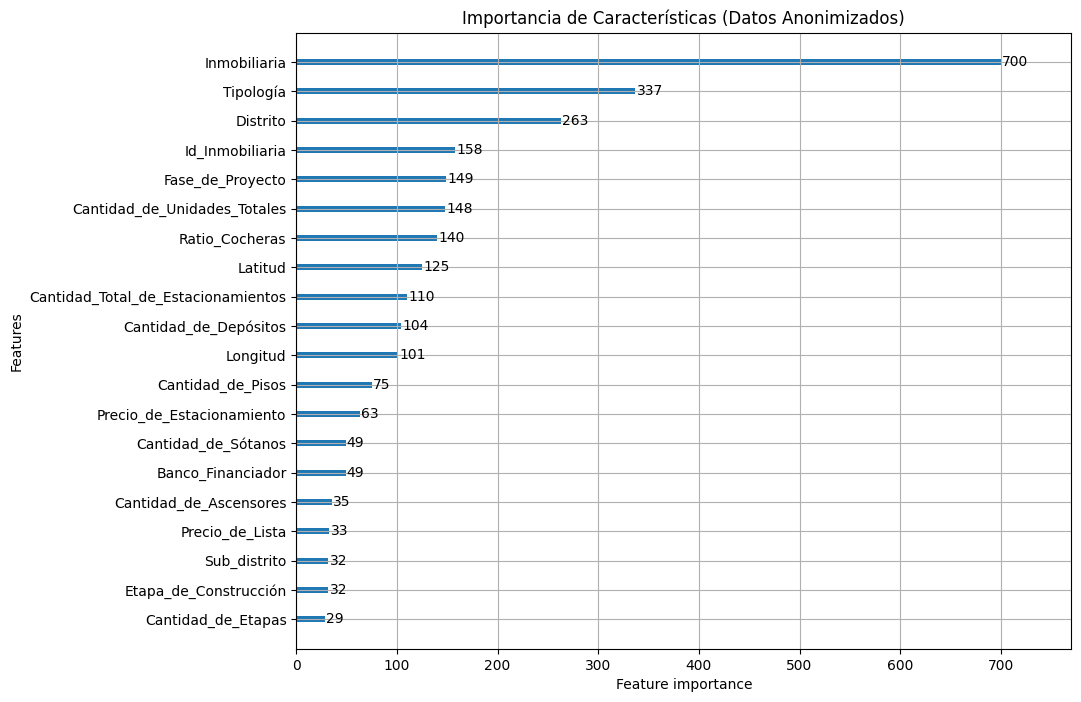

In [10]:
import pandas as pd
import joblib
import lightgbm as lgb # Necesita tener lightgbm instalado (pip install lightgbm)

print("--- CARGANDO ARTEFACTOS DEL MODELO ---")
try:
    # Cargar los 3 archivos
    model = joblib.load('modelo_velocidad_venta.joblib')
    model_columns = joblib.load('model_columns.joblib')
    categorical_info = joblib.load('categorical_info.joblib')
    print("✅ Modelo y artefactos cargados exitosamente.")
except FileNotFoundError:
    print("⚠️ Error: Asegúrate de que los 3 archivos .joblib estén en la misma carpeta que este script.")
    exit()


def predecir_velocidad_venta(datos_departamento):
    """
    Predice la velocidad de venta para un nuevo departamento.
    'datos_departamento' debe ser un diccionario de Python.
    """
    # Crear un DataFrame de una sola fila a partir del diccionario
    df_pred = pd.DataFrame([datos_departamento])

    # Asegurar que el DataFrame tenga todas las columnas que el modelo espera, en el orden correcto
    # y con valores nulos para las que no se especificaron.
    df_pred = df_pred.reindex(columns=model_columns)

    # Convertir las columnas categóricas al tipo 'category' con las categorías correctas
    for col, categories in categorical_info.items():
        # Usamos pd.Categorical para asegurar que el tipo de dato sea el correcto
        df_pred[col] = pd.Categorical(df_pred[col], categories=categories)

    # Realizar la predicción
    prediccion = model.predict(df_pred)
    return prediccion[0]


# --- EJEMPLO DE USO ---
if __name__ == "__main__":
    print("\n--- EJEMPLO DE PREDICCIÓN ---")

    # Tu compañero debe llenar las características del departamento que quiere evaluar.
    # Para las columnas categóricas, debe usar los códigos anónimos.
    # Puede ver las opciones disponibles en el archivo 'categorical_info.joblib' (si decides compartirlo)
    # o puedes darle una lista de las opciones más comunes.
    departamento_a_evaluar = {
        'Inmobiliaria': 'Inmobiliaria_5', # Código anónimo
        'Tipología': 'TIPO A',
        'Distrito': 'Miraflores',
        'Fase_de_Proyecto': 'En Planos',
        'Ratio_Cocheras': 1.5,
        'Cantidad_de_Unidades_Totales': 120,
        'Latitud': -12.12,
        'Longitud': -77.03,
        'Cantidad_Total_de_Estacionamientos': 180,
        'Cantidad_de_Depósitos': 100,
        'Id_Inmobiliaria': 5, # Código anónimo
        'Cantidad_de_Pisos': 15,
        'Precio_de_Lista': 250000
        # No es necesario llenar todas las columnas, las faltantes se tratarán como nulas
    }

    velocidad_estimada = predecir_velocidad_venta(departamento_a_evaluar)

    print(f"\nDatos del departamento a evaluar:")
    for key, value in departamento_a_evaluar.items():
        print(f"  - {key}: {value}")

    print(f"\n🚀 Velocidad de Venta Estimada: {velocidad_estimada:.4f}")

    # También puede ver la importancia de las features (con nombres anonimizados)
    print("\n--- ANÁLISIS: IMPORTANCIA DE CARACTERÍSTICAS ---")
    lgb.plot_importance(model, max_num_features=20, figsize=(10, 8))
    import matplotlib.pyplot as plt
    plt.title("Importancia de Características (Datos Anonimizados)")
    plt.show()